### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
# Import dataset
file_path = "/Users/alibilal/Library/CloudStorage/OneDrive-Personal/04-Study_and_Skills/11-Maven_Analytics/89_Python_guided_projects/AirBnB_Listing_Analysis/Airbnb_Data/Listings.csv"

airbnb_ds = pd.read_csv(file_path, 
                        encoding='latin-1', 
                        parse_dates=['host_since'])

/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_1292/1348041114.py:4: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_ds = pd.read_csv(file_path,


In [3]:
# Analyse dataset
airbnb_ds.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
airbnb_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

### Filter data

In [5]:
paris_listings = (
    airbnb_ds
    .query("city == 'Paris'")
    .loc[:,['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


### Exploratory Data Analysis

In [6]:
paris_listings.describe(include='all')

,host_since,neighbourhood,city,accommodates,price
count,64657,64690,64690,64690.000000,64690.000000
unique,NaN,20,1,NaN,NaN
top,NaN,Buttes-Montmartre,Paris,NaN,NaN
freq,NaN,7237,64690,NaN,NaN
mean,2015-11-01 11:06:05.528867584,NaN,NaN,3.037997,113.096445
min,2008-08-30 00:00:00,NaN,NaN,0.000000,0.000000
25%,2014-03-09 00:00:00,NaN,NaN,2.000000,59.000000
50%,2015-07-07 00:00:00,NaN,NaN,2.000000,80.000000
75%,2017-05-29 00:00:00,NaN,NaN,4.000000,120.000000
max,2021-02-07 00:00:00,NaN,NaN,16.000000,12000.000000


In [7]:
# Missing Values
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [8]:
# find irregular values
paris_listings.query('price == 0').count()

# Not filtering for now, to match results and the % is low (62/64657)

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [9]:
paris_listings = paris_listings[paris_listings['price'] != 0]
paris_listings.describe(include='all')

,host_since,neighbourhood,city,accommodates,price
count,64595,64628,64628,64628.000000,64628.000000
unique,NaN,20,1,NaN,NaN
top,NaN,Buttes-Montmartre,Paris,NaN,NaN
freq,NaN,7235,64628,NaN,NaN
mean,2015-10-30 22:46:09.985293056,NaN,NaN,3.040602,113.204942
min,2008-08-30 00:00:00,NaN,NaN,1.000000,8.000000
25%,2014-03-09 00:00:00,NaN,NaN,2.000000,59.000000
50%,2015-07-06 00:00:00,NaN,NaN,2.000000,80.000000
75%,2017-05-25 00:00:00,NaN,NaN,4.000000,120.000000
max,2021-02-07 00:00:00,NaN,NaN,16.000000,12000.000000


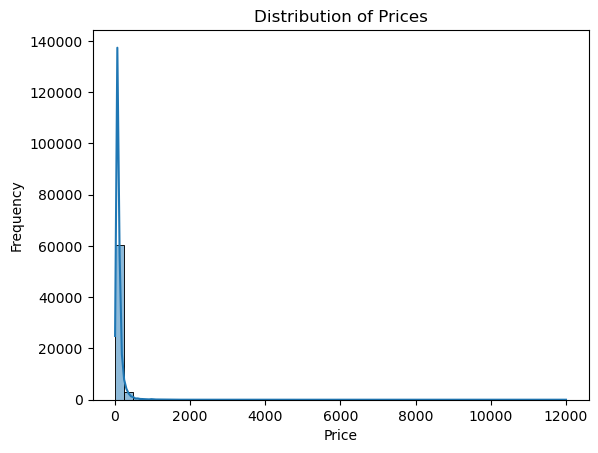

In [10]:
# Plotting a histogram for the distribution of prices
#plt.figure(figsize=(10, 6))
sns.histplot(paris_listings['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

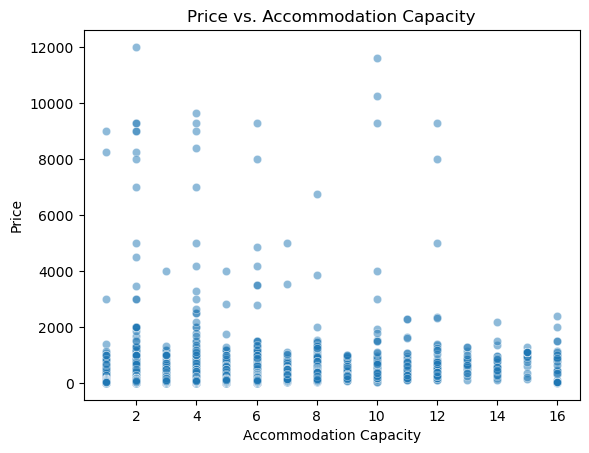

In [11]:

#plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='price', data=paris_listings, alpha=0.5)
plt.title('Price vs. Accommodation Capacity')
plt.xlabel('Accommodation Capacity')
plt.ylabel('Price')
plt.show()

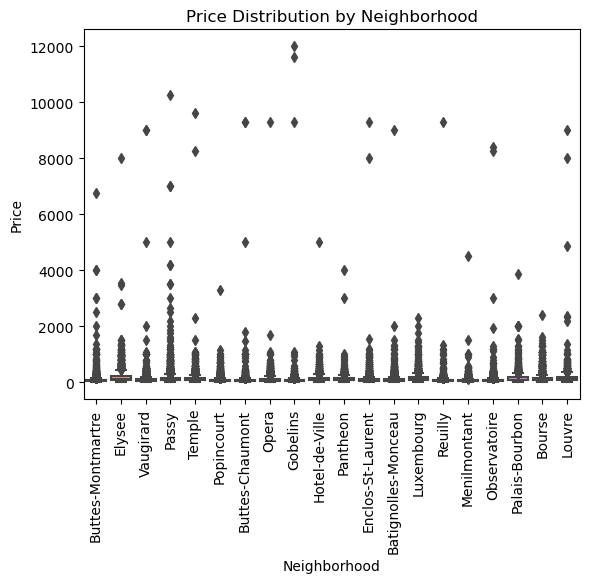

In [12]:
#plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=paris_listings)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

In [13]:
paris_listing_nbhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg({'price': 'mean'})
    .sort_values('price')
)

paris_listing_nbhood.head().round(2)

,price
neighbourhood,
Menilmontant,74.96
Buttes-Chaumont,82.69
Buttes-Montmartre,87.23
Reuilly,89.13
Popincourt,90.59


In [14]:
paris_listing_accomms = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({"price" : "mean"})
    .sort_values("price")
    .round(2)
)

paris_listing_accomms

,price
accommodates,
1,79.52
3,153.88
2,155.10
4,212.10
5,328.82
6,355.51
8,405.52
7,411.54
9,440.27


In [15]:
paris_listing_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y") #resample the data by year
    .agg({
        'neighbourhood' : "count", #count number of listings per year
        'price' : 'mean' #calculate the mean price of each year
    })
    .round(2)
)

paris_listing_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.75
2009-12-31,106,159.64
2010-12-31,416,125.03
2011-12-31,1339,124.83
2012-12-31,4592,111.58
2013-12-31,8142,107.10
2014-12-31,10922,100.25
2015-12-31,12147,103.65
2016-12-31,8867,114.21


### Visualise the data

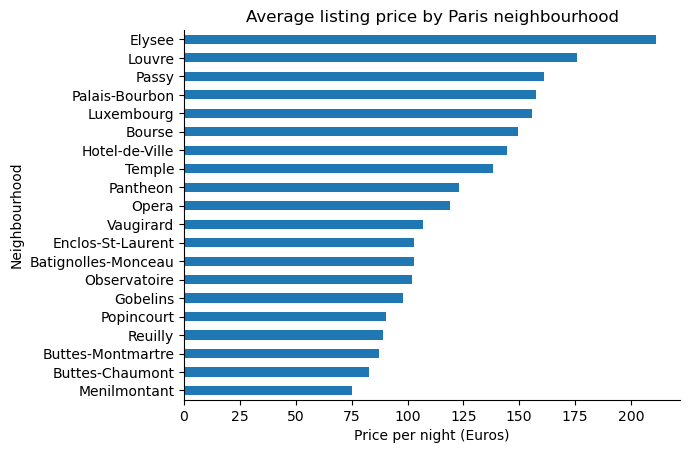

In [16]:
(paris_listing_nbhood
 .plot
 .barh(
     title = "Average listing price by Paris neighbourhood",
     xlabel = "Price per night (Euros)",
     ylabel = "Neighbourhood",
     legend = None
 )
)

sns.despine()

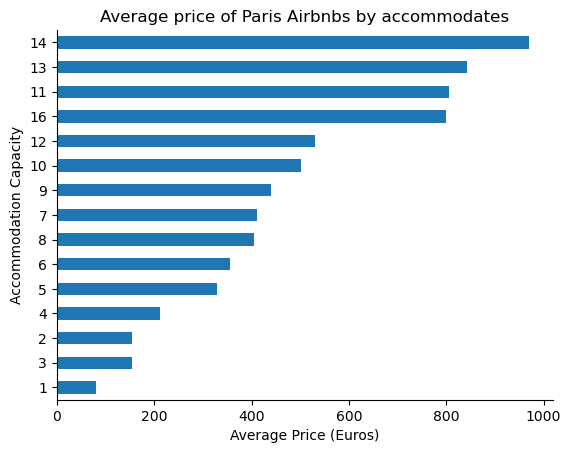

In [17]:
(paris_listing_accomms
 .plot
 .barh(
     title = "Average price of Paris Airbnbs by accommodates",
     xlabel = "Average Price (Euros)",
     ylabel = "Accommodation Capacity",
     legend = None
 )
)

sns.despine()

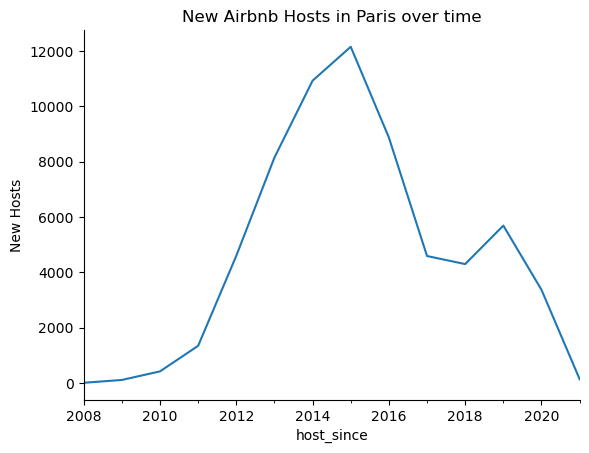

In [18]:
paris_listing_over_time['neighbourhood'].plot(
    ylabel='New Hosts',
    title='New Airbnb Hosts in Paris over time'
)

sns.despine()

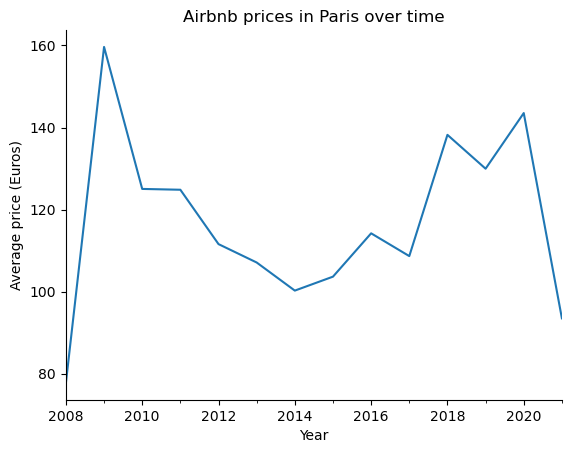

In [19]:
paris_listing_over_time['price'].plot(
    xlabel="Year",
    ylabel='Average price (Euros)',
    title='Airbnb prices in Paris over time'
)

sns.despine()

Text(0, 0.5, 'Average price')

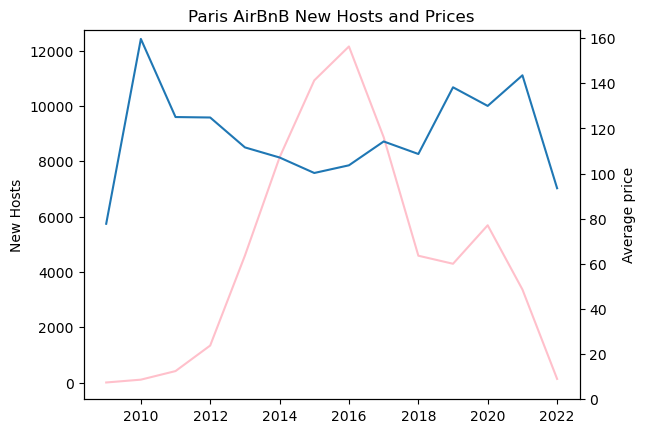

In [20]:
fig, ax =  plt.subplots()

ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time['neighbourhood'],
    label="New Hosts",
    c='pink'
)
ax.set_title('Paris AirBnB New Hosts and Prices')
ax.set_ylabel('New Hosts')

ax2 = ax.twinx()
ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time['price'],
    label="Average price"
)
ax2.set_ylim(0) # reset 
ax2.set_ylabel('Average price')